# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: Explorative Datenanlyse mittels Pandas Profiling

In diesem Notebook wird explorative Datenanalyse auf den gesammelten Daten durchgeführt.

---

# Libraries importieren

In [1]:
# import Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# Daten einlesen

In [2]:
# File: Alle_Messungen.csv einlesen 
data_raw = pd.read_csv('Alle_Messungen.csv', sep=',', index_col=0)
# convert time column to datetime
data_raw['time'] = pd.to_datetime(data_raw['time'])
# display first 5 rows of data_raw
display("data raw", data_raw.head(5))


# read in the data
#df = pd.read_csv('Alle_Messungen_trimmed.csv')
#df.head()


# File: Alle_Messungen_trimmed.csv einlesen
data_trimmed = pd.read_csv('Alle_Messungen_trimmed.csv', index_col=0)
# convert time column to datetime
data_trimmed['time'] = pd.to_datetime(data_trimmed['time'])
# display first 5 rows of data_trimmed
display("data trimmed", data_trimmed.head(5))

'data raw'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


'data trimmed'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


---
# Anzahl Messungen pro Person und Bewegungsprofil

In [3]:
# function to get number of measurements per user and class
def get_n_obs(data):
    return pd.DataFrame(data.groupby(["id", "user", "class"]).first().groupby(["user", "class"]).count().sort_values(["user", "class"]).iloc[:, 0]).reset_index()

# get number of measurements per user and class before and after trimming
data_n_obs = get_n_obs(data_raw).rename(columns={'time': 'number of measurements total'})
# display data_n_obs 
#display("Number of measurements per user and class", data_n_obs.head())

data_n_obs_trimmed = get_n_obs(data_trimmed).rename(columns={'time': 'number of measurements trimmed'})
# display data_n_obs_trimmed
#display("Number of measurements per user and class", data_n_obs_trimmed.head())

# combine data_n_obs and data_n_obs_trimmed
data_merged = data_n_obs.merge(data_n_obs_trimmed, on=['user', 'class'])
# display data_merged
#display("Data merged DataFarme", data_merged.head())

# melt data_merged
data_merged = data_merged.melt(id_vars=['user', 'class'], value_vars=['number of measurements total', 'number of measurements trimmed'], var_name='total_or_trimmed', value_name='number_of_measurements')
# display data_merged
#display("Data merged DataFarme", data_merged.head())

# display data_merged example
display("Number of measurements per user and class", data_merged[data_merged['user'] == 'Ben_Tran'])

'Number of measurements per user and class'

,user,class,total_or_trimmed,number_of_measurements
0,Ben_Tran,Laufen,number of measurements total,8
1,Ben_Tran,Rennen,number of measurements total,11
2,Ben_Tran,Sitzen,number of measurements total,13
3,Ben_Tran,Stehen,number of measurements total,12
4,Ben_Tran,Treppenlaufen,number of measurements total,18
5,Ben_Tran,Velofahren,number of measurements total,12
49,Ben_Tran,Laufen,number of measurements trimmed,8
50,Ben_Tran,Rennen,number of measurements trimmed,11
51,Ben_Tran,Sitzen,number of measurements trimmed,13
52,Ben_Tran,Stehen,number of measurements trimmed,12


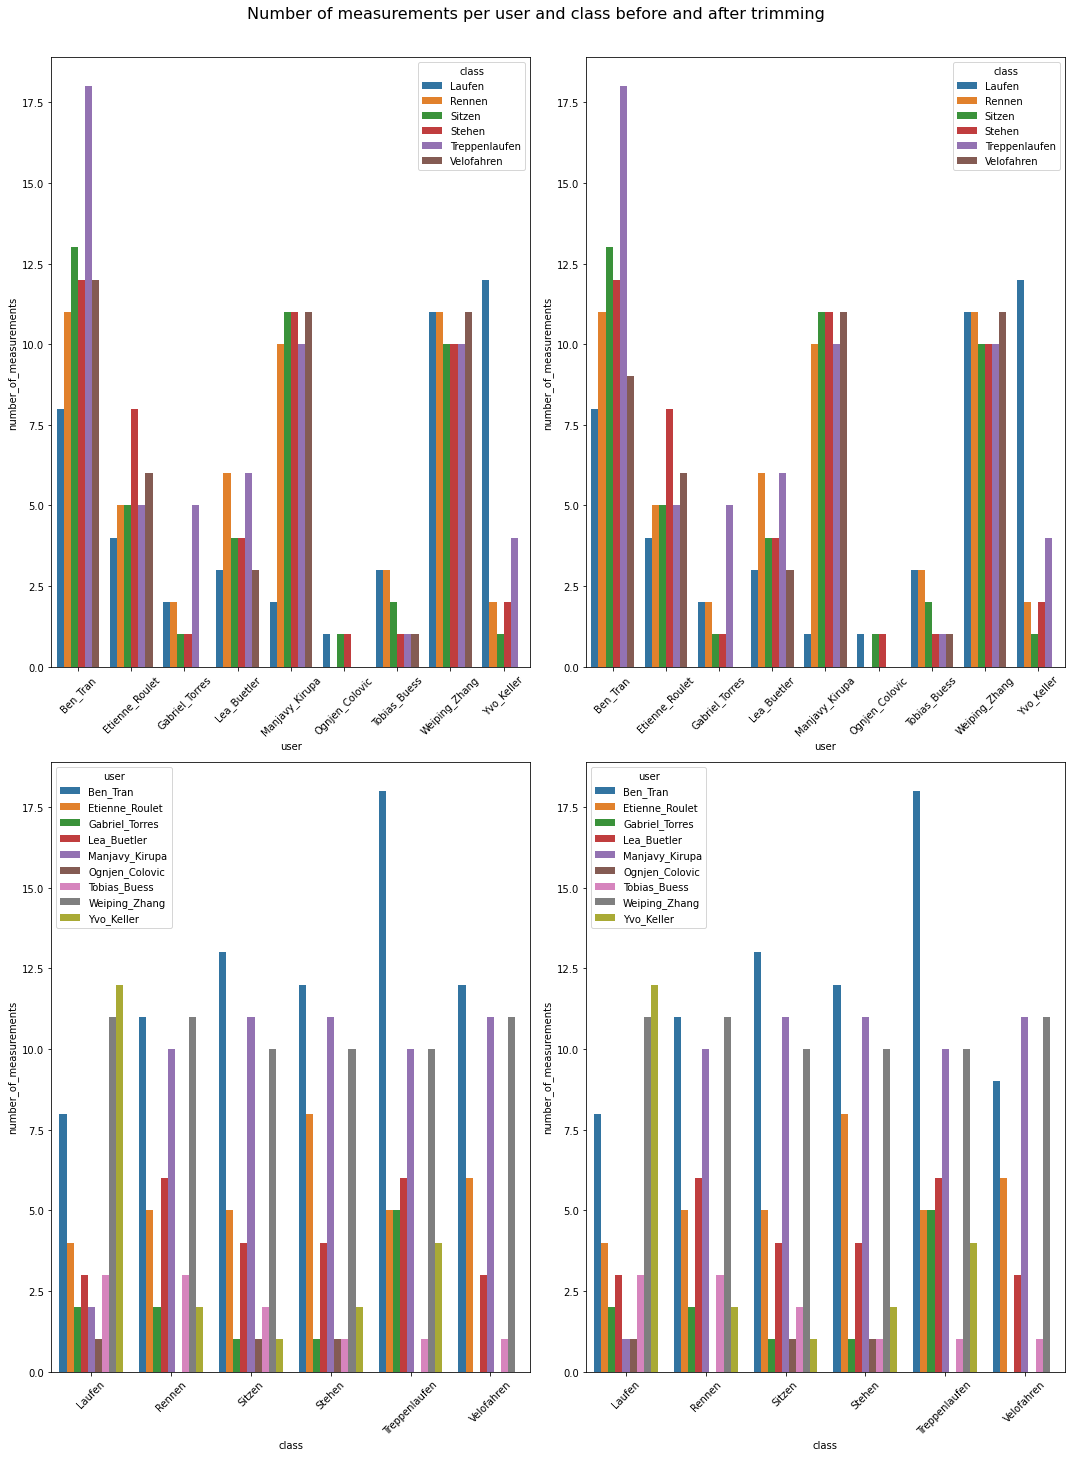

In [4]:
# plot number of measurements per user and class before and after trimming
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
sns.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[0, 0])
sns.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[0, 1])
sns.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[1, 0])
sns.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[1, 1])
#rotate xticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
fig.suptitle('Number of measurements per user and class before and after trimming', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

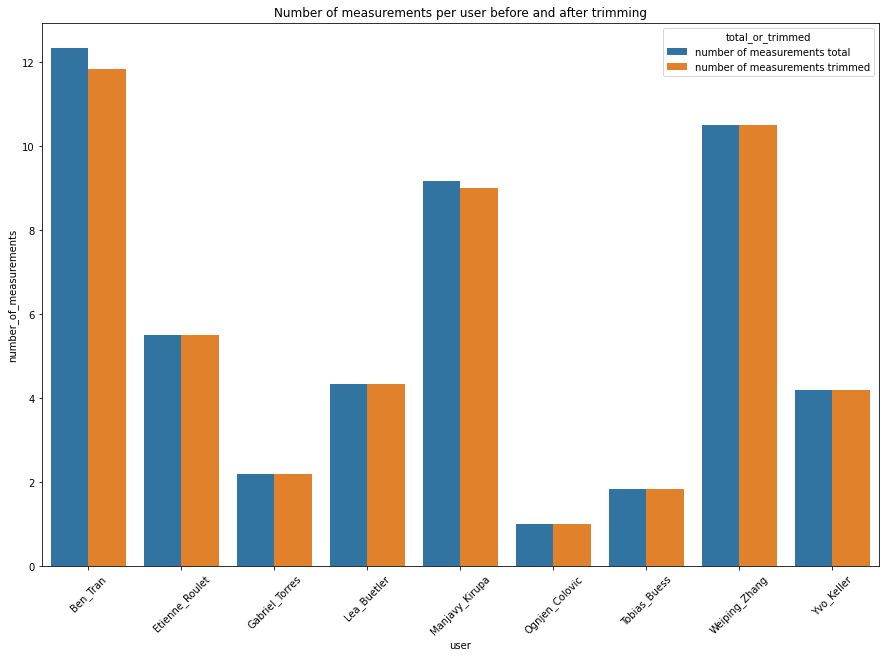

In [5]:
# barplot of number of measurements per user before and after trimming
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x='user', y='number_of_measurements', hue='total_or_trimmed', data=data_merged, ax=ax, errorbar=None)
ax.set_title('Number of measurements per user before and after trimming')
plt.xticks(rotation=45)
plt.show()

---
# Boxplots Visualisierungen

In [6]:
# function to plot the sensor data
def plot_sensor(df, sensor='Accelerometer', title='Alle Daten'):
    '''
    sensor = 'Accelerometer' or 'Gyroscope' or 'Magnetometer' or 'Orientation'
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    if sensor == 'Orientation':
        sns.boxplot(x='class', y=sensor + '_qx', data=df, ax=ax1)
        sns.boxplot(x='class', y=sensor + '_qy', data=df, ax=ax2)
        sns.boxplot(x='class', y=sensor + '_qz', data=df, ax=ax3)
    else:
        sns.boxplot(x='class', y=sensor + '_x', data=df, ax=ax1)
        sns.boxplot(x='class', y=sensor + '_y', data=df, ax=ax2)
        sns.boxplot(x='class', y=sensor + '_z', data=df, ax=ax3)
    fig.suptitle(sensor + ' ' + title)
    plt.tight_layout()
    plt.setp(ax1.get_xticklabels(), rotation=45)
    plt.setp(ax2.get_xticklabels(), rotation=45)
    plt.setp(ax3.get_xticklabels(), rotation=45)
    plt.show()

# make list of all sensors
all_sensors = ['Accelerometer', 'Gyroscope', 'Magnetometer', 'Orientation']

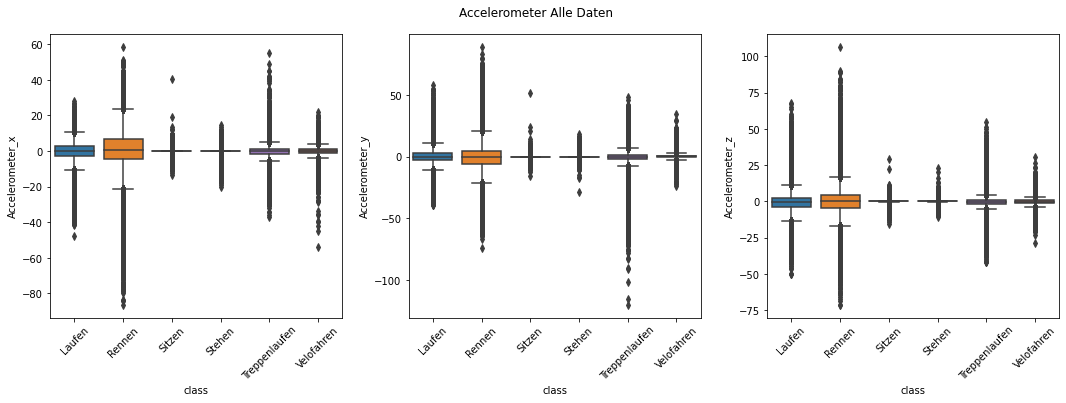

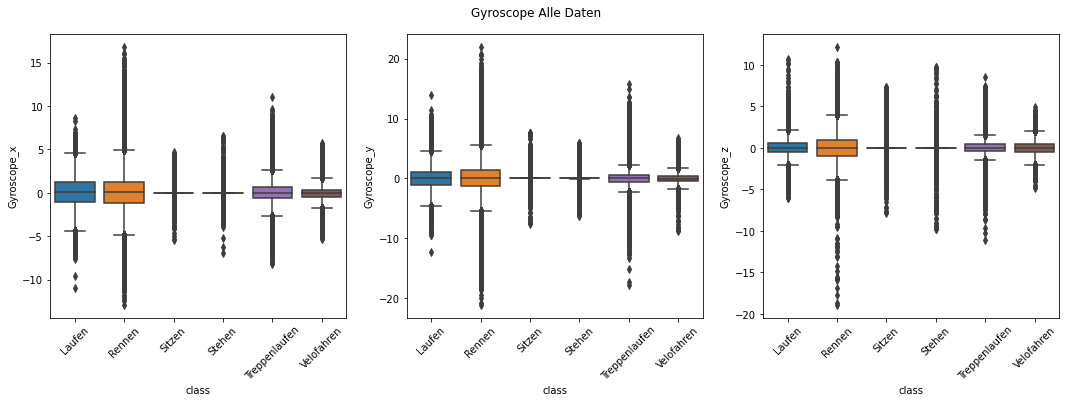

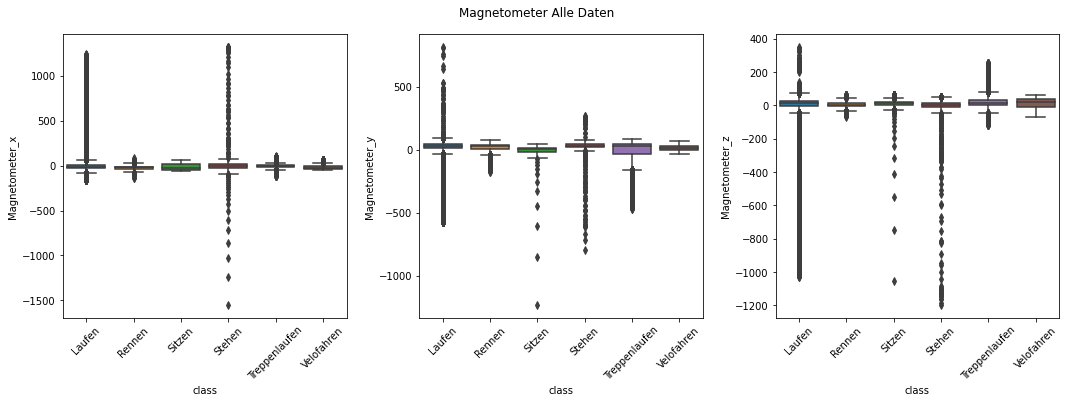

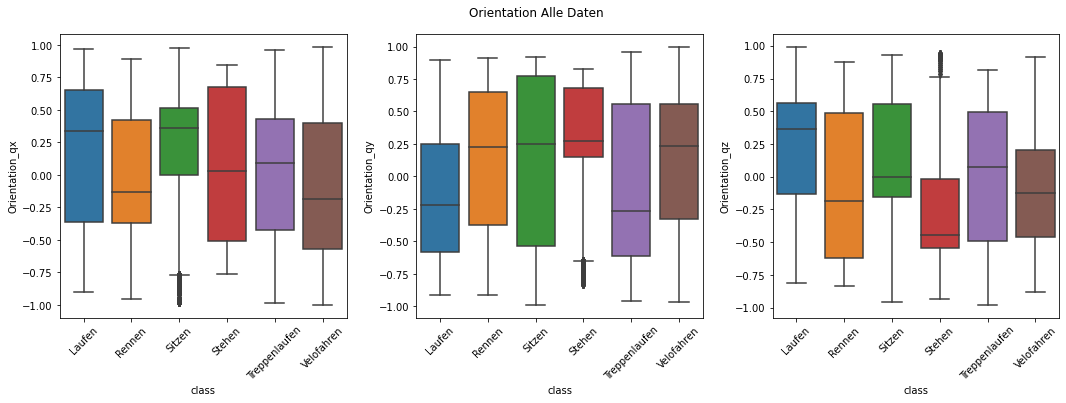

In [7]:
# plot all sensors
for sensor in all_sensors:
    plot_sensor(data_trimmed, sensor=sensor)

In [8]:
# filter the data on user == Ben_Tran
df_ben = data_trimmed[data_trimmed['user'] == 'Ben_Tran']
display(df_ben.head())

# filter the data on user == Gabriel_Torres
df_gabriel = data_trimmed[data_trimmed['user'] == 'Gabriel_Torres']
display(df_gabriel.head())

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
53911,2023-02-23 17:00:34.397,0.550319,-1.281488,0.226031,0.744445,-0.706854,-0.637591,1.696217,-51.602867,-8.583054,-0.620842,0.238000,-0.141863,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53912,2023-02-23 17:00:34.407,0.944033,2.140067,0.009051,0.780291,-0.396729,-0.516007,1.808224,-51.749489,-8.150375,-0.624680,0.237639,-0.139115,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53913,2023-02-23 17:00:34.417,1.640152,0.965561,-0.010259,0.764055,-0.474354,-0.547985,2.056381,-52.079834,-7.844223,-0.628399,0.236936,-0.136902,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53914,2023-02-23 17:00:34.427,1.956851,-0.833580,0.804928,0.797792,-0.700352,-0.683836,2.329872,-52.260269,-7.561409,-0.632357,0.236648,-0.133770,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53915,2023-02-23 17:00:34.437,0.778156,-1.687740,-0.166946,0.805876,-0.710112,-0.670803,2.556515,-52.458702,-7.078743,-0.636543,0.236465,-0.129988,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...


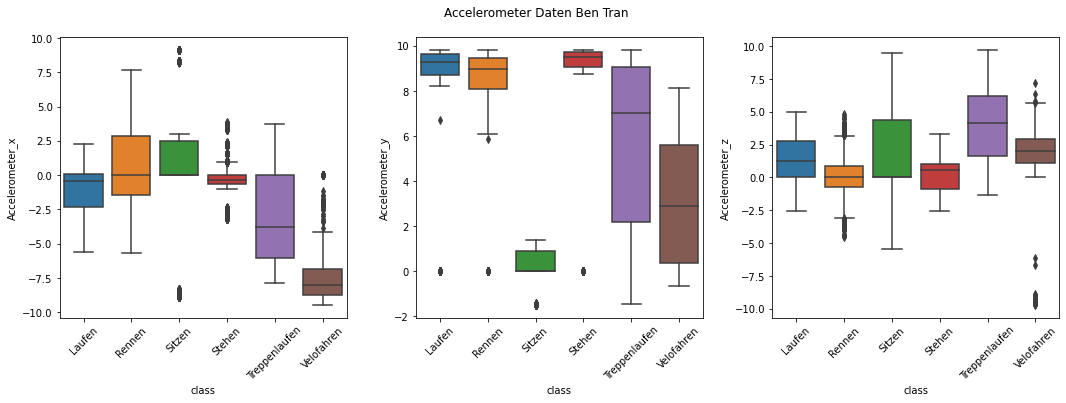

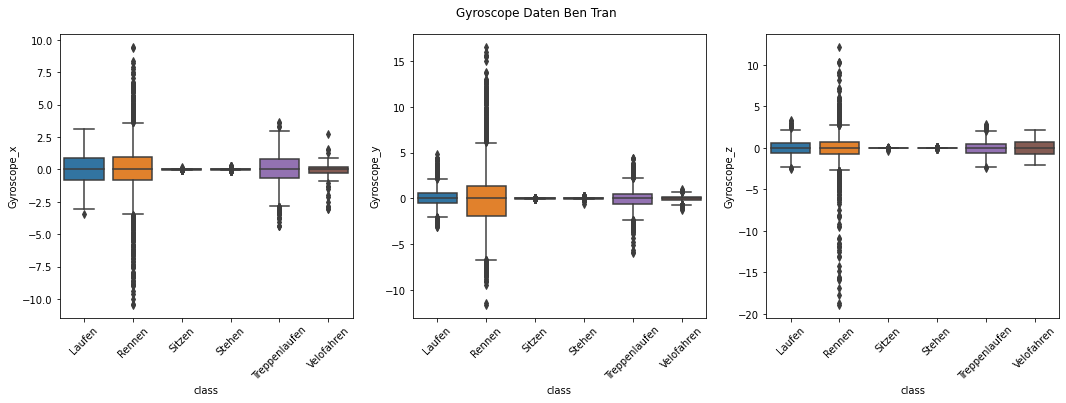

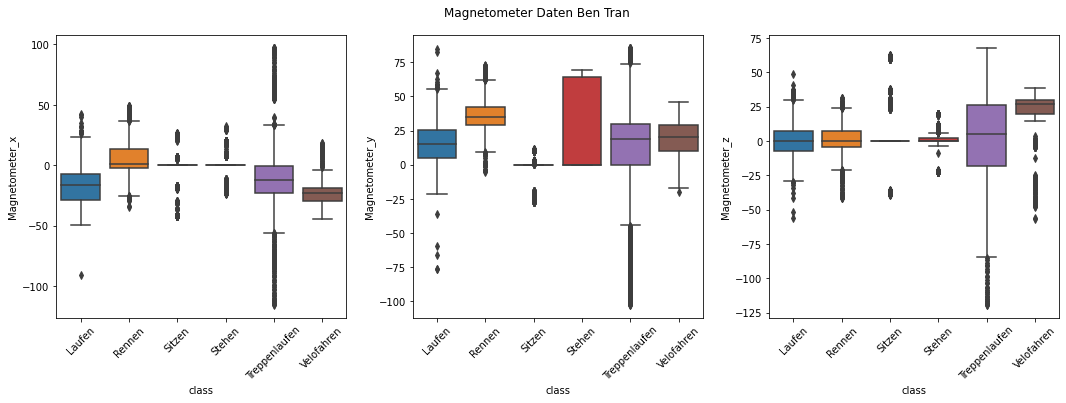

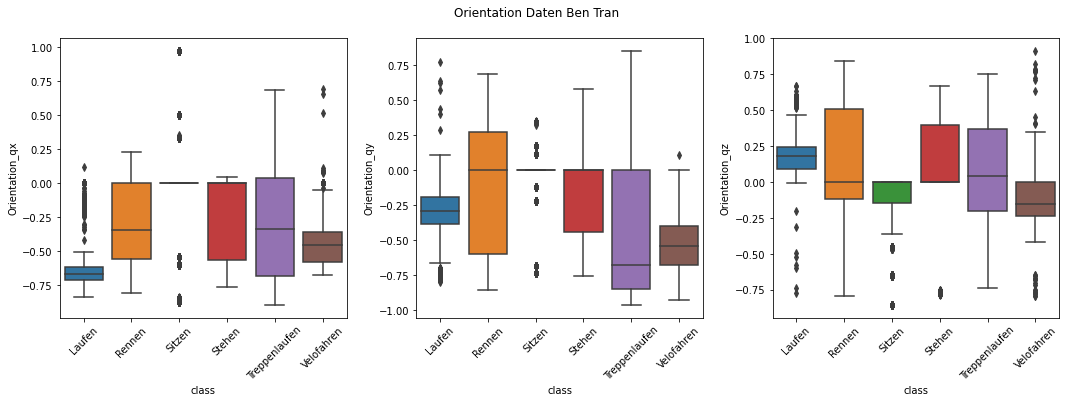

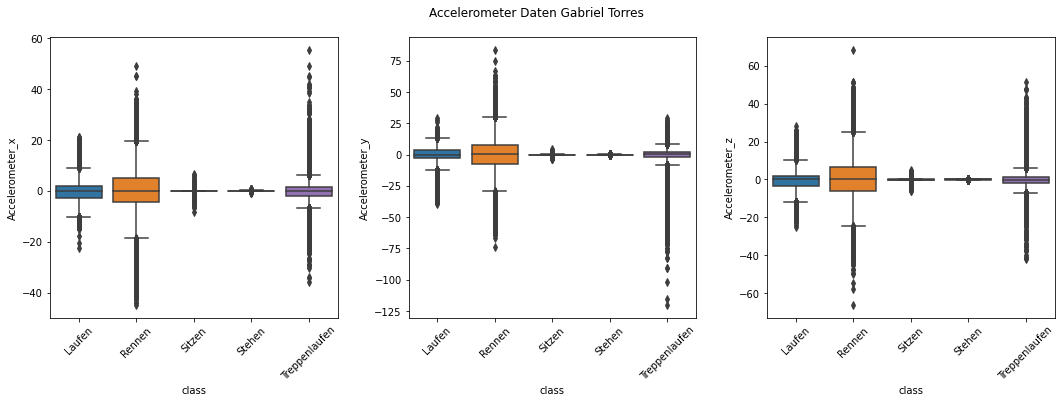

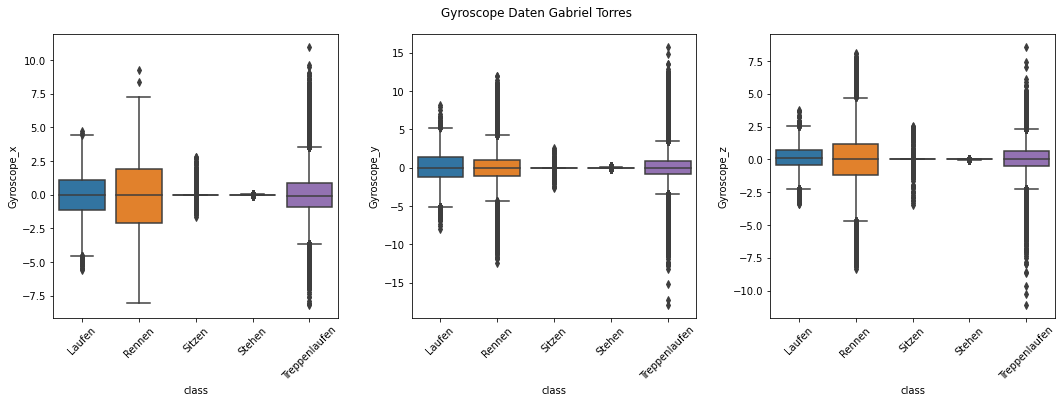

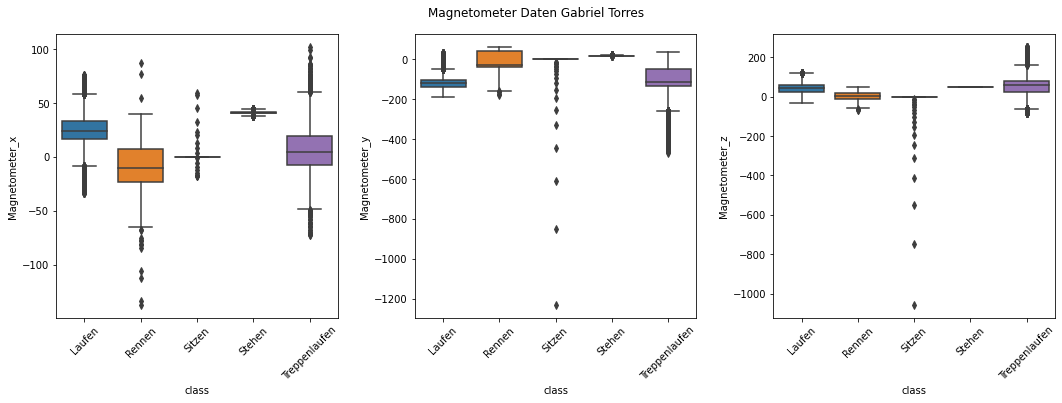

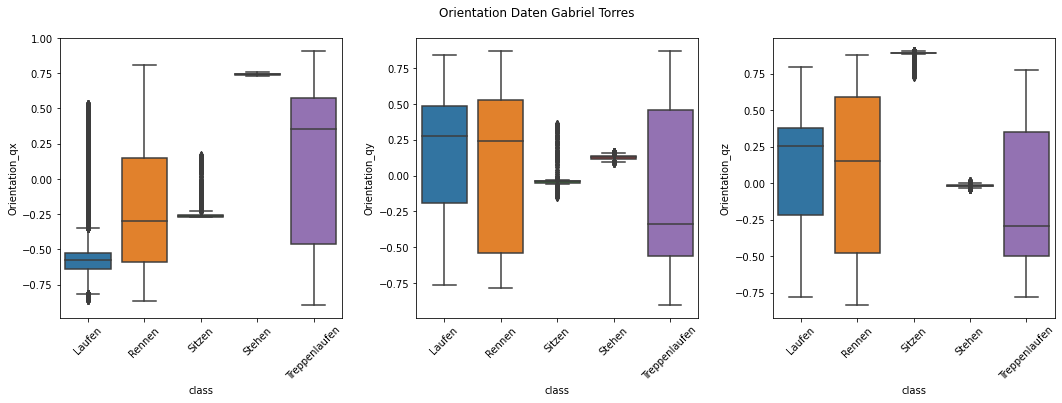

In [9]:
# plot all sensors for Ben
for sensor in all_sensors:
    plot_sensor(df_ben, sensor=sensor, title='Daten Ben Tran')

# plot all sensors for Gabriel
for sensor in all_sensors:
    plot_sensor(df_gabriel, sensor=sensor, title='Daten Gabriel Torres')

---
# Visualisierungen der Sensoren Daten

Hier werden wir die Sensordaten visualisieren. 

- Accelerometer
- Gyroscope
- Magnetometer
- Orientation

In [10]:
# Funkction for plotting raw vs trimmed data
def sensor_plot(df_raw, df_trimmed, title = ''):

# create 8 subplots in one figure
    fig, axs = plt.subplots(4, 2, figsize=(15, 15))

    # plot the raw data Accelerometer
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_x', color = 'red', alpha = 0.5, ax=axs[0,0])
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_y', color = 'green', alpha = 0.5, ax=axs[0,0])
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_z', color = 'blue', alpha = 0.5, ax=axs[0,0])
    axs[0,0].set_title('Accelerometer Raw Data')
    axs[0,0].set_xlabel('Time')
    axs[0,0].set_ylabel('Acceleration')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_x', color = 'red', alpha = 0.5, ax=axs[0,1])
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_y', color = 'green', alpha = 0.5, ax=axs[0,1])
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_z', color = 'blue', alpha = 0.5, ax=axs[0,1])
    axs[0,1].set_title('Accelerometer Trimmed Data')
    axs[0,1].set_xlabel('Time')
    axs[0,1].set_ylabel('Acceleration')

    # plot the raw data Gyroscope
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_x', color = 'red', alpha = 0.5, ax=axs[1,0])
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_y', color = 'green', alpha = 0.5, ax=axs[1,0])
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_z', color = 'blue', alpha = 0.5, ax=axs[1,0])
    axs[1,0].set_title('Gyroscope Raw Data')
    axs[1,0].set_xlabel('Time')
    axs[1,0].set_ylabel('Gyroscope')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_x', color = 'red', alpha = 0.5, ax=axs[1,1])
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_y', color = 'green', alpha = 0.5, ax=axs[1,1])
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_z', color = 'blue', alpha = 0.5, ax=axs[1,1])
    axs[1,1].set_title('Gyroscope Trimmed Data')
    axs[1,1].set_xlabel('Time')
    axs[1,1].set_ylabel('Gyroscope')

    # plot the raw data Magnetometer
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_x', color = 'red', alpha = 0.5, ax=axs[2,0])
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_y', color = 'green', alpha = 0.5, ax=axs[2,0])
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_z', color = 'blue', alpha = 0.5, ax=axs[2,0])
    axs[2,0].set_title('Magnetometer Raw Data')
    axs[2,0].set_xlabel('Time')
    axs[2,0].set_ylabel('Magnetometer')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_x', color = 'red', alpha = 0.5, ax=axs[2,1])
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_y', color = 'green', alpha = 0.5, ax=axs[2,1])
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_z', color = 'blue', alpha = 0.5, ax=axs[2,1])
    axs[2,1].set_title('Magnetometer Trimmed Data')
    axs[2,1].set_xlabel('Time')
    axs[2,1].set_ylabel('Magnetometer')

    # plot the raw data Orientation
    sns.lineplot(data=df_raw, x='time', y='Orientation_qx', color = 'red', alpha = 0.5, ax=axs[3,0])
    sns.lineplot(data=df_raw, x='time', y='Orientation_qy', color = 'green', alpha = 0.5, ax=axs[3,0])
    sns.lineplot(data=df_raw, x='time', y='Orientation_qz', color = 'blue', alpha = 0.5, ax=axs[3,0])
    axs[3,0].set_title('Orientation Raw Data')
    axs[3,0].set_xlabel('Time')
    axs[3,0].set_ylabel('Orientation')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qx', color = 'red', alpha = 0.5, ax=axs[3,1])
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qy', color = 'green', alpha = 0.5, ax=axs[3,1])
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qz', color = 'blue', alpha = 0.5, ax=axs[3,1])
    axs[3,1].set_title('Orientation Trimmed Data')
    axs[3,1].set_xlabel('Time')
    axs[3,1].set_ylabel('Orientation')


    # overall title plot has the ids of the sensor measurement
    fig.suptitle('File Name :' + str(title) + \
                "\nNumber of Observation for Raw Data: " + str(len(df_raw)) + \
                "\nNumber of Observation for Trimmed Data: " + str(len(df_trimmed)), 
                fontsize=16, 
                y=1.01)
    
    plt.tight_layout()
    plt.show()
    
    # save figure to folder plots/raw-vs-trimmed
    fig.savefig('plots/raw-vs-trimmed/' + str(title) + '.png', dpi=300, bbox_inches='tight')

['11_iphone13mini-2023-03-12_12-07-48Weiping_ZhangRennen'
 '7_iphone13mini-2023-03-12_12-01-19Weiping_ZhangLaufen'
 '05_iPhone14Pro-2023-03-09_16-34-41Yvo_KellerLaufen'
 '1_iphone13mini-2023-03-12_11-22-48Weiping_ZhangLaufen']


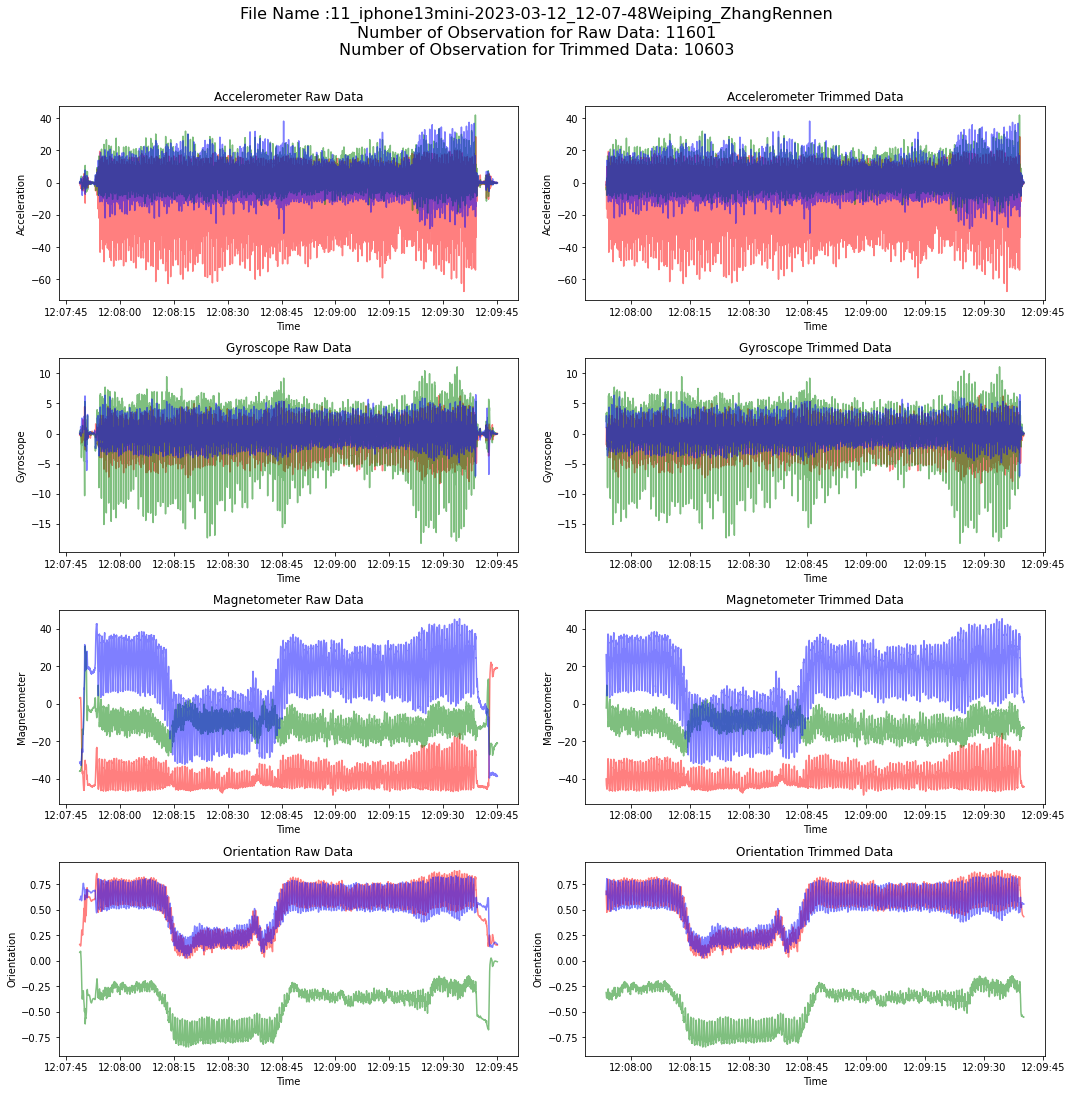

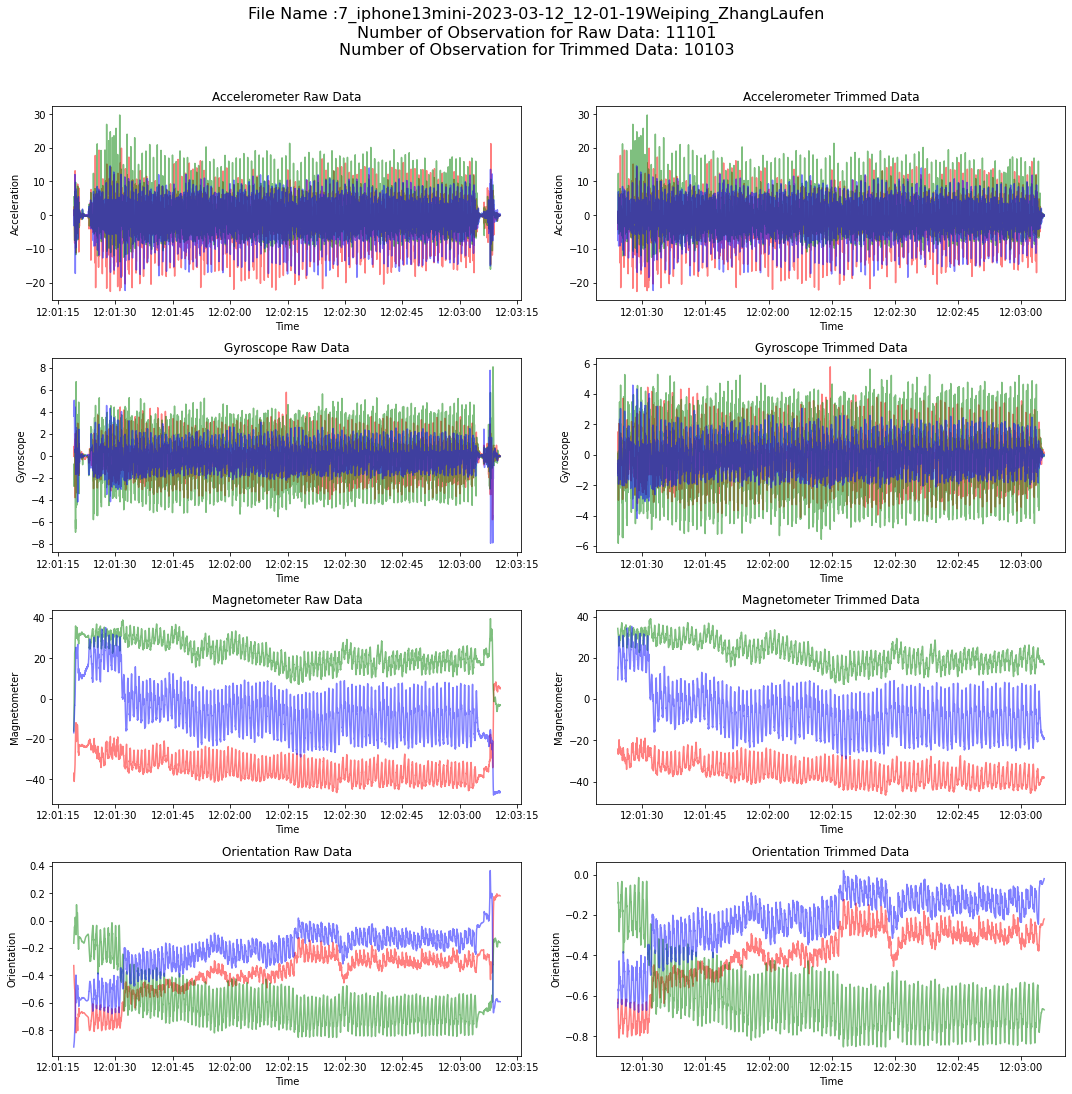

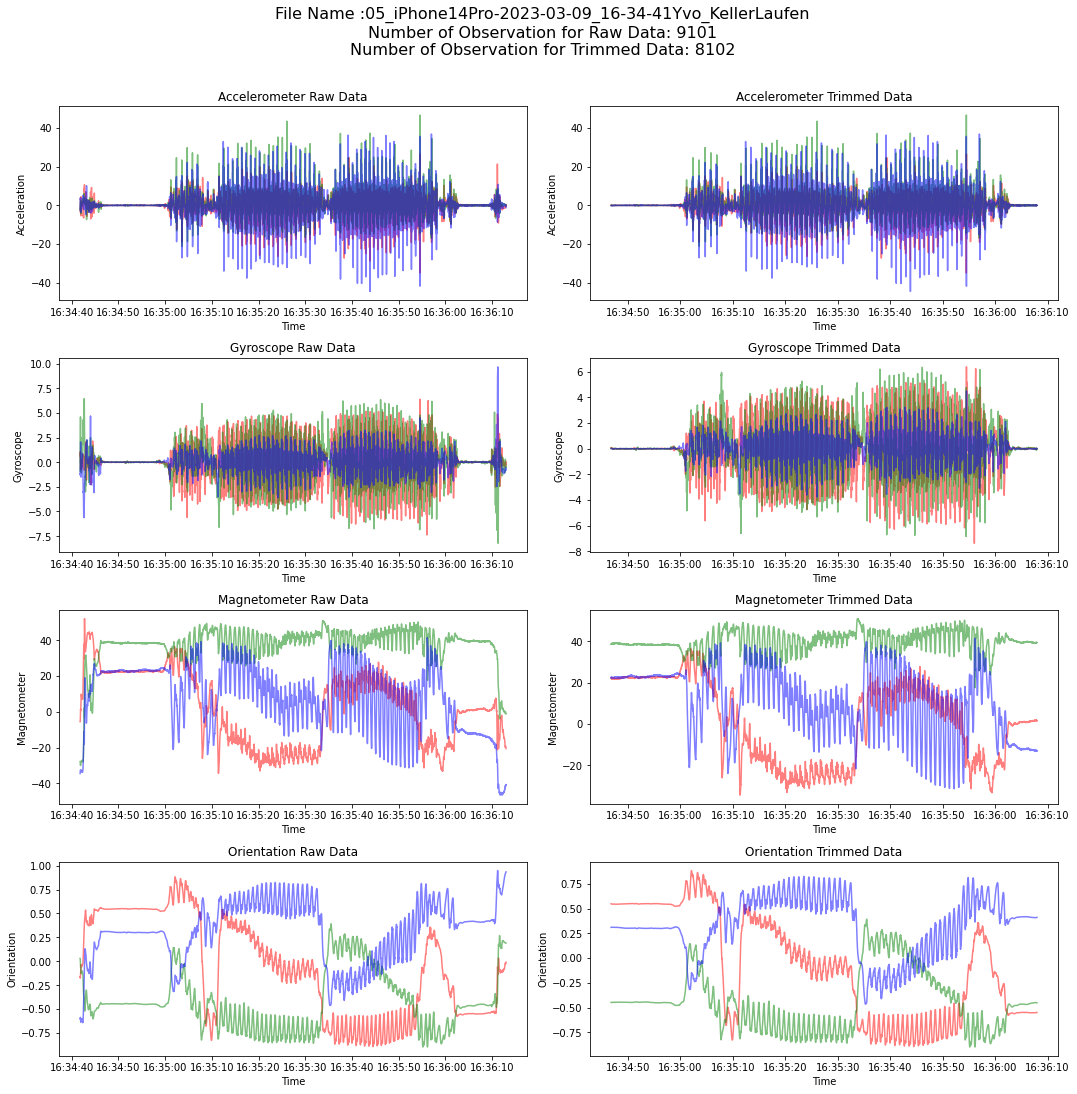

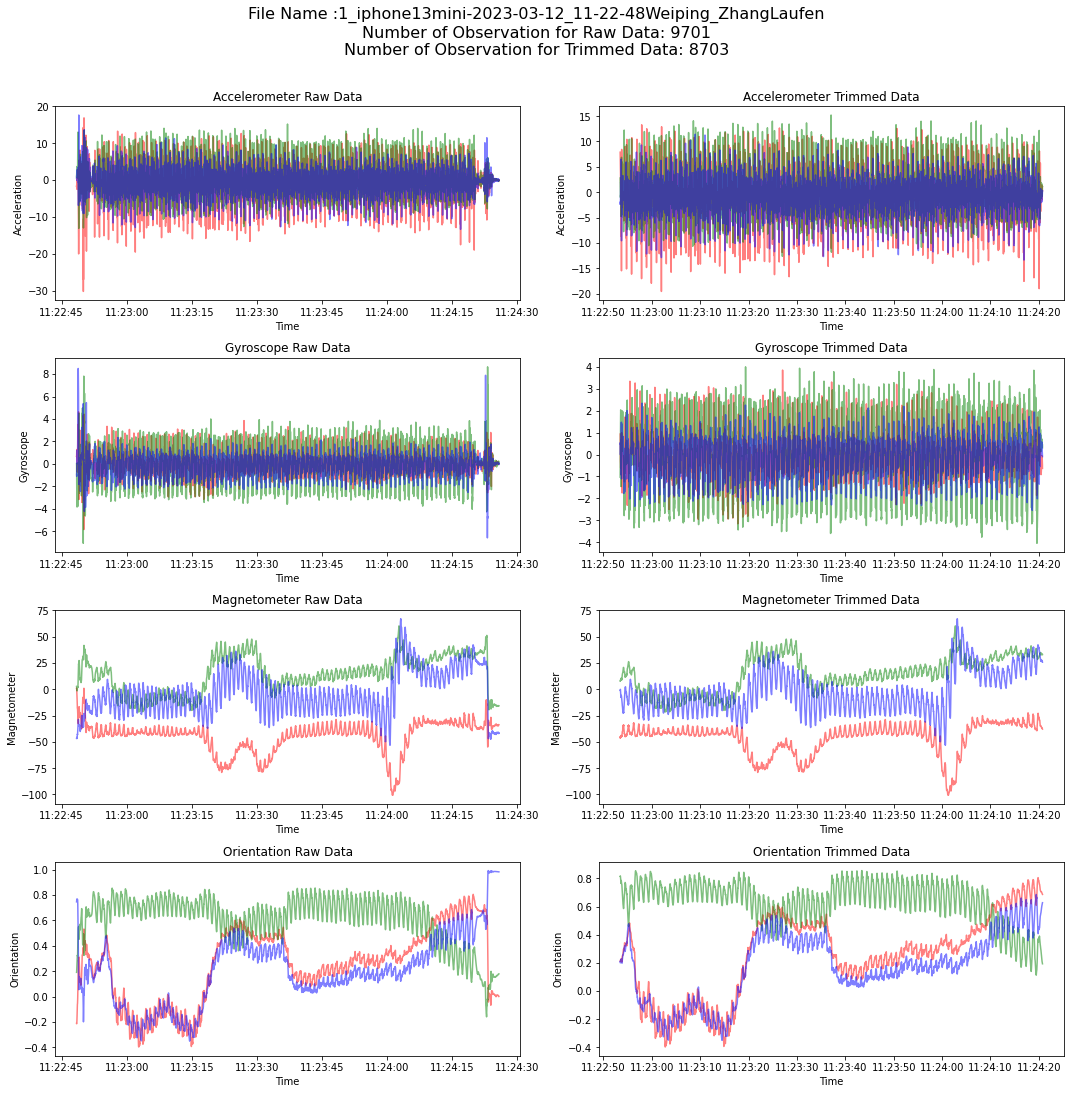

In [11]:
# get all unique files
all_files = data_raw['id_combined'].unique()

# Because there are some files that are quite big, we are selecting randomly 10 files and will plot them
# We are using the random seed 42 to make sure that we are getting the same files every time we run the code
np.random.seed(3)
random_files = np.random.choice(all_files, 4, replace=False)

# print all random_files
print(random_files)

# now we are creating a for loop to first filter the data for each file and then plot the data
for file in random_files: # alternative random_files -> all_files
    # filter data for each file
    data_raw_filtered = data_raw[data_raw['id_combined'] == file]
    data_trimmed_filtered = data_trimmed[data_trimmed['id_combined'] == file]

    # call sensor_plot function
    sensor_plot(data_raw_filtered, data_trimmed_filtered, file)

---